# 深層学習day4

### 強化学習
* 長期的に報酬を最大化できるように環境のなかで行動を選択できるエージェントを作ることを目標とする機械学習の一分野
* 行動の結果として与えられる利益(報酬)をもとに、行動を決定する原理を改善していく仕組み
* 強化学習では、優れた方策を見つけることが目標
___

### 強化学習イメージ
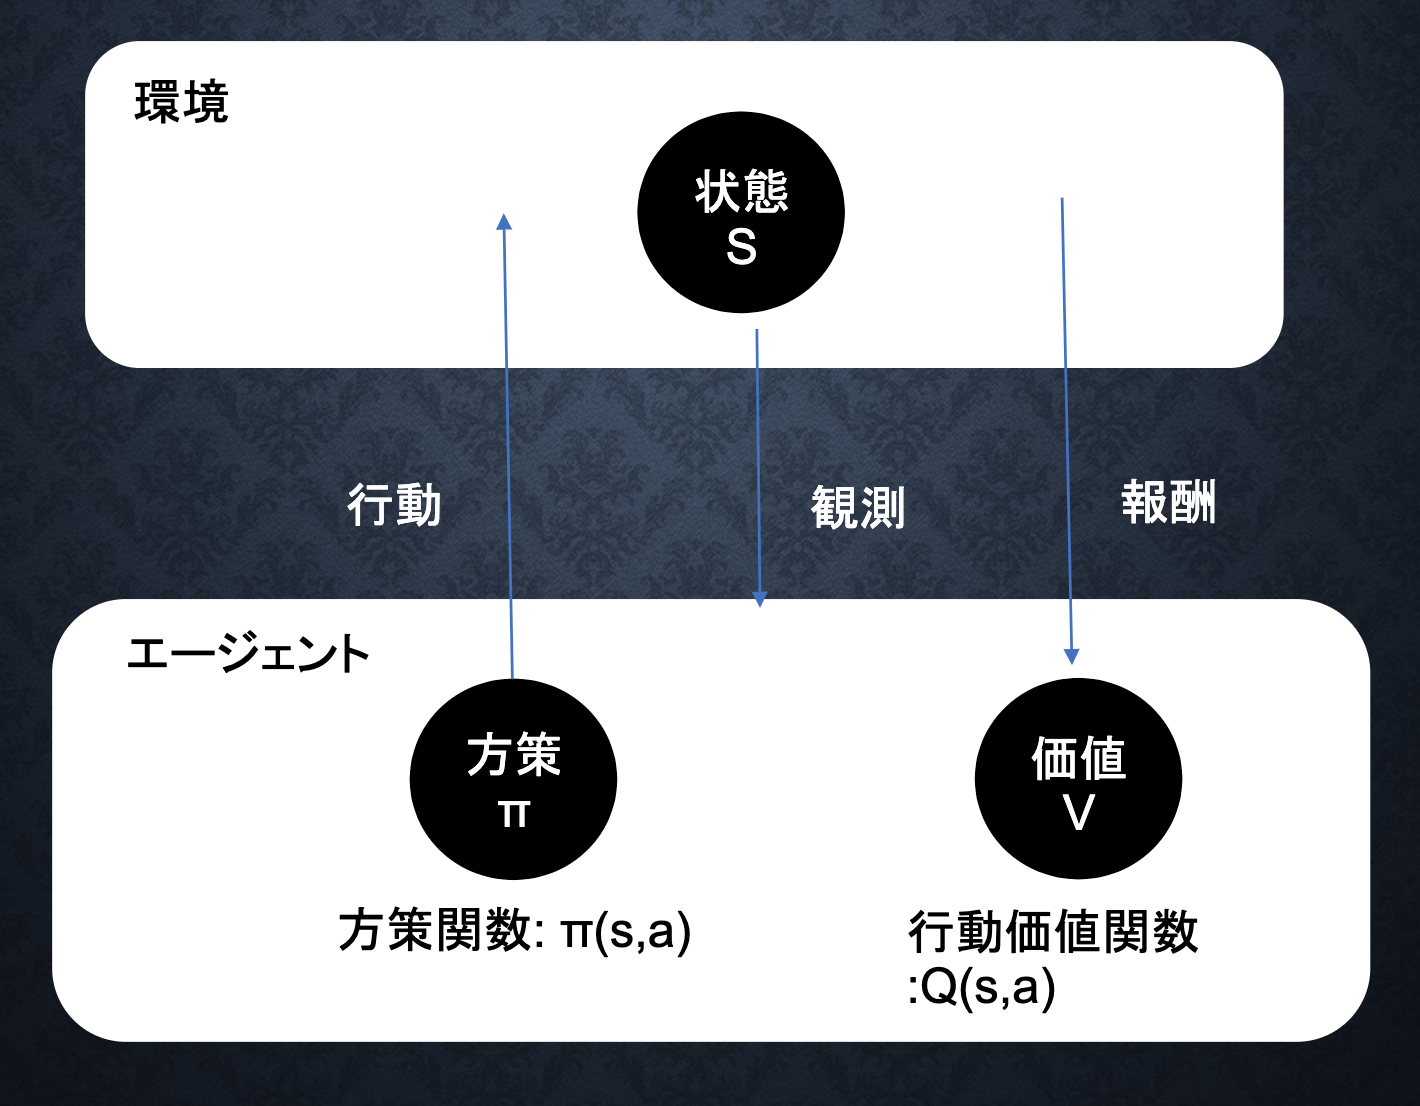
* マーケティングを例とするならば...
* 環境...会社の販売促進部
* エージェント...プロフィールと購入履歴に基づいて、キャンペーンメールを送る顧客を決めるソフトウェア
* 行動...顧客ごとに送信、非送信のふたつの行動を選ぶ
* 報酬...キャンペーンのコストという負の報酬とキャンペーンで生み出されると推測される売上という正の報酬を受ける
___

### 探索と利用のトレードオフ
* 環境について事前に完璧な知識があれば、最適な行動を予測し決定することは可能
* 強化学習の場合、上記仮定は成り立たないとする。不完全な知識を元に行動しながら、データを収集。最適な行動を見つけていく
___

### 探索と利用のトレードオフ2
* 過去のデータで、ベストとされる行動のみを常に取り続ければ他にもっとベストな行動を見つけることはできない(探索が足りない)
* 未知の行動のみを常に取り続ければ、過去の経験が活かせない(利用が足りない)
* 上記二つがトレードオフ
___

### 強化学習の歴史
* 計算速度の進展により大規模な状態をもつ場合の、強化学習を可能としつつある
* 関数近似法と、Q学習を組み合わせる手法の登場
* **Q学習**...行動価値関数を、行動する毎に更新することにより学習を進める方法
* **関数近似法**...価値関数や方策関数を関数近似する手法
___

### 価値関数
$$
V^\pi(s)\\
Q^\pi(s,a)
$$
* 価値を表す関数としては、状態価値関数と行動価値関数の2種類がある
* ある状態の価値に注目する場合は、状態価値関数
* 状態と価値を組み合わせた価値に注目する場合は、行動価値関数
___

### 方策関数
* 方策ベースの強化学習手法において、ある状態でどのような行動を採るのかの確率を与える関数
___

### 方策勾配法
$$\theta^{(t+1)}=\theta^{(t)}+\epsilon\nabla J(\theta)$$
* 方策反復法...方策をモデル化して最適化する手法
* 上式の$J$...方策の良さ(定義する必要がある)
* 最大値問題を解くので、加算の式
___

### 方策勾配定理
$$  
\nabla_{\theta} J( \theta )
=\mathbb{E}_{\pi _{\theta}}[(\nabla _{\theta} \log{\pi _{\theta}}(\alpha | s)Q^{\pi}(s, \alpha) )] 
$$
* $J$をもとめるための定理
* 式変換とうは省略
___

# Alpha Go

### Alpha Go LeeのPolicyNet(方策関数)
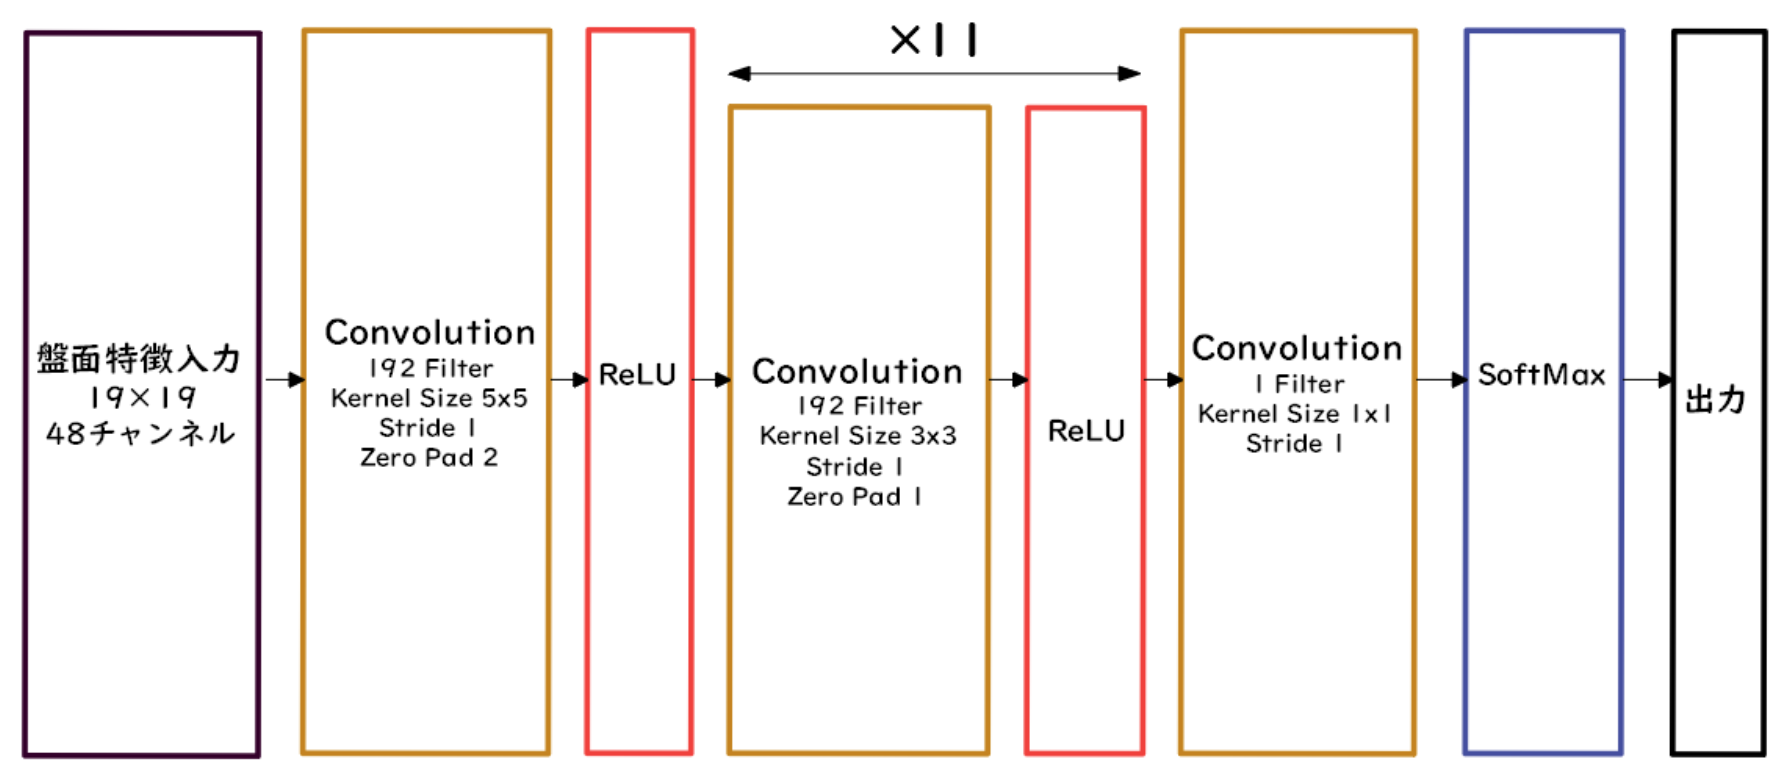
* どこに打つのが一番いいのかを確率(19×19の2次元データ)を出力するネットワーク
* 入力チャンネル...石、取られる石の数、着手履歴など必要な情報
* 畳み込みネットワーク
* 出力層にはsoftmax
___

### Alpha Go LeeのValueNet(価値関数)
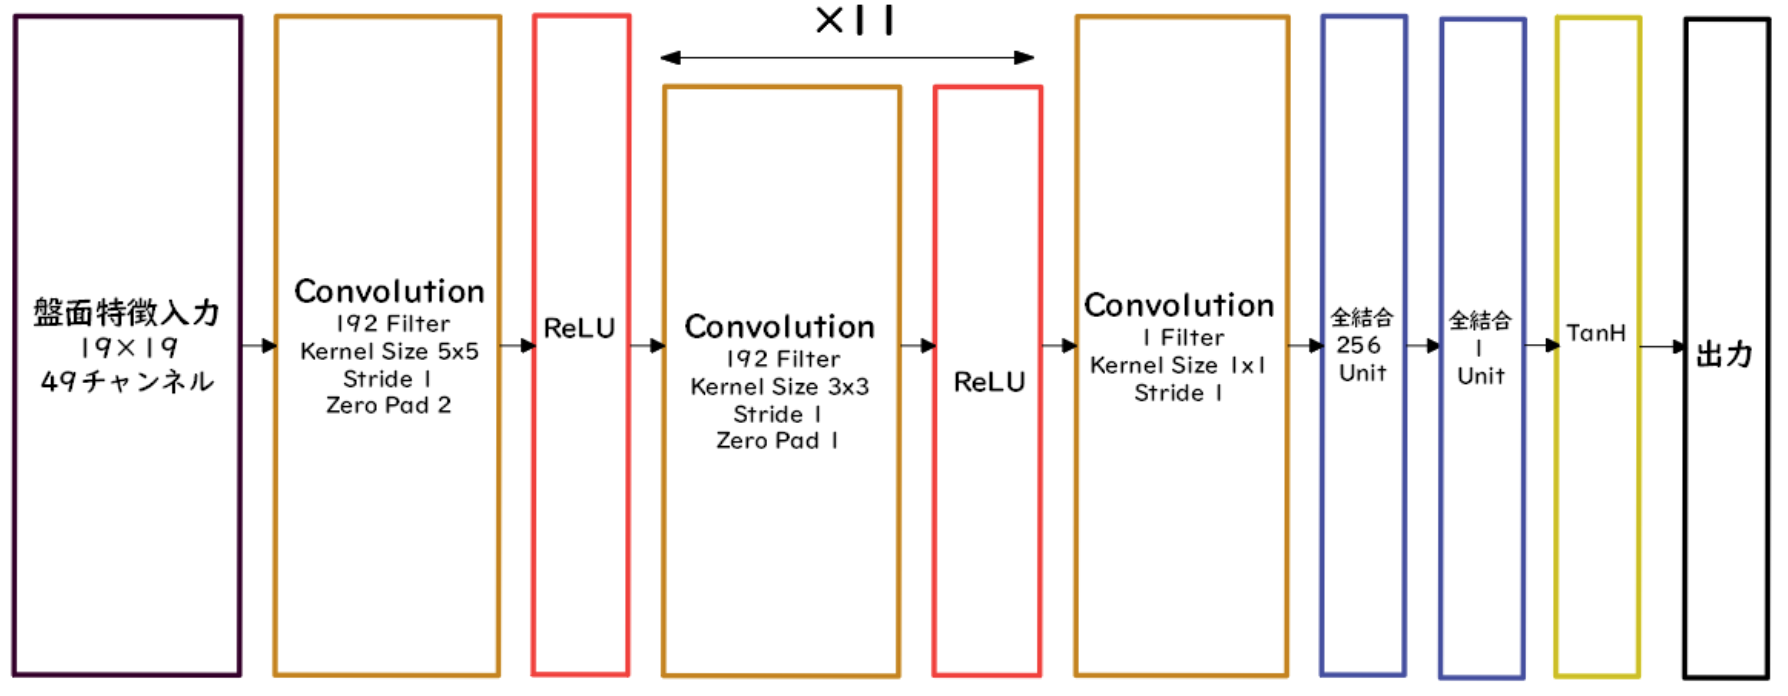
* 入力は1チャンネル多い(手番)
* 現局面の勝率を-1~1の範囲(1次元データ)で出力する
___

### RollOutPolicy
* NNではなく線形の方策関数
* 探索中に高速に着手確率を出すために使用される
___

### Alpha Go の学習
1. 教師あり学習によるRollOutPolicyとPolicyNetの学習
2. 強化学習によるPolicyNetの学習
3. 強化学習によるValueNetの学習
___

### 1.PolicyNetの教師あり学習
* KGS Go Server（ネット囲碁対局サイト）の棋譜データから3000万局面分の教師を用意し、教師と同じ着手を予測できるよう学習
* 教師が着手した手を1とし残りを0とした19×19次元の配列を教師とし、それを分類問題として学習
___

### 2.PolicyNetの強化学習
* 現状のPolicyNetとPolicyPoolからランダムに選択されたPolicyNetと対局シミュレーションを行い、その結果を用いて方策勾配法で学習
* PolicyPool...PolicyNetの強化学習の過程を500Iteraionごとに記録し保存しておいたもの
___

### 3.ValueNetの強化学習
* PolicyNetを使用して対局シミュレーションを行い、その結果の勝敗を教師として学習
* 教師データの作成方法は省略
___

### モンテカルロ木探索
* コンピュータ囲碁ソフトでは現在もっとも有効とされている探索法
* 勝敗のみを使って探索を行うことができないか、という発想で生まれた探索法
* 現局面から末端局面までPlayOutと呼ばれるランダムシミュレーションを多数回行い、その勝敗を集計して着手の優劣を決定する
* 該当手のシミュレーション回数が一定数を超えたら、その手を着手したあとの局面をシミュレーション開始局面とするよう、探索木を成長させる
___

### Alpha Go Zero(Leeとの違い)
* 教師あり学習を一切行わず、強化学習のみで作成
* 特徴入力からヒューリスティックな要素を排除し、石の配置のみにした
* PolicyNetとValueNetを１つのネットワークに統合した
* Residual Netを導入した
* モンテカルロ木探索からRollOutシミュレーションをなくした
___

### ResidualNetwork
* ネットワークにショートカット構造を追加して、勾配の爆発、消失を抑える効果を狙ったもの
* 100層を超えるネットワークでの安定した学習が可能となった
___

### Alpha Go Zeroの学習法
* **自己対局による教師データの作成**...現状のネットワークでモンテカルロ木探索を用いて自己対局を行う。教師データの形は(局面、着手選択確率分布、勝敗)が１セット
* **学習**...自己対局で作成した教師データを使い学習を行う。NetworkのPolicy部分の教師に着手選択確率分布を用い、Value部分の教師に勝敗を用いる
* **ネットワークの更新**...学習後、現状のネットワークと学習後のネットワークとで対局テストを行い、学習後のネットワークの勝率が高かった場合、学習後のネットワークを現状のネットワークとする
___

# 軽量化・高速化技術